In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_data.csv')
call_data = pd.read_csv('call_data.csv', index_col=[0])

In [3]:
call_data.insert(4, 'cancelled', 0)
for order_id in train_data[train_data['cancelled'] == 1]['order_id'] :
    call_data.loc[call_data['order_id'] == order_id, 'cancelled'] = 1

In [4]:
train_data[train_data.duplicated(keep=False)]
train_data.drop_duplicates(inplace=True)

In [5]:
datetime_format = '%Y-%m-%d %H:%M:%S'
error_type = 'coerce'

for col in ['order_date','order_time','allot_time','accept_time','pickup_time','delivered_time','cancelled_time'] :
    train_data[col] = pd.to_datetime(train_data[col], format=datetime_format, errors=error_type)

In [6]:
df1 = train_data[train_data['allot_time'] > train_data['accept_time']]
print(len(df1))
df1.head()

25


,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
9893,2021-01-26 09:09:44,566646,2021-01-26,2021-01-26 09:53:44,2021-01-26 09:20:42,NaT,NaT,15012,2.3087,1.47,146.0,143.0,1,3.0,1757.0,auto,Reassign,1.0,240.733333,2021-01-26 10:02:22
11482,2021-01-26 10:21:44,568235,2021-01-26,2021-01-26 11:16:32,2021-01-26 10:25:02,NaT,NaT,21094,2.5128,0.14,2.0,2.0,1,0.0,22.0,auto,Reassign,1.0,267.650000,2021-01-26 11:18:37
18809,2021-01-26 14:15:25,575562,2021-01-26,2021-01-26 15:48:34,2021-01-26 14:17:56,NaT,NaT,1852,0.4747,4.39,145.0,145.0,1,0.0,1044.0,auto,Reassignment Request from SE portal.,1.0,395.950000,2021-01-26 15:49:16
80364,2021-01-28 07:26:28,480216,2021-01-28,2021-01-28 07:56:46,2021-01-28 07:31:28,NaT,NaT,2661,1.8565,5.45,NaN,NaN,1,NaN,49.0,auto,Reassign,1.0,5.300000,2021-01-28 08:03:34
86561,2021-01-28 09:52:09,486411,2021-01-28,2021-01-28 17:47:58,2021-01-28 09:52:24,NaT,NaT,17641,1.4031,4.86,12.0,12.0,1,0.0,108.0,NaN,Reassignment Request from SE portal.,1.0,NaN,2021-01-28 17:48:09


In [7]:
df2 = train_data[train_data['accept_time'] > train_data['pickup_time']]
print(len(df2))
df2.head()

10


,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
96454,2021-01-28 14:30:24,496306,2021-01-28,2021-01-28 15:29:00,2021-01-28 15:29:10,2021-01-28 15:19:26,NaT,4078,0.4792,4.49,108.0,108.0,1,0.0,548.0,NaN,NaN,NaN,284.850000,2021-01-28 15:39:43
103632,2021-01-28 15:32:27,503487,2021-01-28,2021-01-28 15:43:29,2021-01-28 15:44:05,2021-01-28 15:38:40,NaT,9663,1.8386,2.07,21.0,21.0,1,0.0,781.0,NaN,NaN,NaN,118.450000,2021-01-28 16:03:49
193689,2021-01-30 17:19:43,432753,2021-01-30,2021-01-30 17:54:56,2021-01-30 17:55:22,2021-01-30 17:54:34,NaT,747,3.1831,1.76,100.0,100.0,1,0.0,330.0,auto,Reassignment Request from SE portal.,1.0,592.500000,2021-01-30 17:59:21
197387,2021-01-31 06:32:00,359608,2021-01-31,2021-01-31 07:30:32,2021-01-31 07:31:28,2021-01-31 07:10:07,NaT,1999,1.3277,4.49,156.0,153.0,1,3.0,1736.0,NaN,NaN,NaN,156.683333,2021-01-31 08:34:01
210900,2021-01-31 13:30:44,373121,2021-01-31,2021-01-31 14:46:52,2021-01-31 14:47:06,2021-01-31 13:41:53,NaT,3915,2.2699,1.47,103.0,102.0,1,1.0,538.0,auto,Reassignment Request from SE portal.,1.0,300.416667,2021-01-31 15:40:32


In [8]:
np.intersect1d(df1['order_id'], df2['order_id'])

array([], dtype=int64)

In [9]:
train_data['order_date_dayofweek'] = train_data['order_date'].dt.dayofweek
train_data['order_time_hour'] = train_data['order_time'].dt.hour

In [10]:
train_data['order_date_dayofweek'].replace(
    {
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
    },
    inplace=True
)

In [11]:
train_data['diff_allot-order'] = (train_data.allot_time - train_data.order_time).astype('timedelta64[s]')
train_data['diff_accept-allot'] = (train_data.accept_time - train_data.allot_time).astype('timedelta64[s]')
train_data['diff_pickup-accept'] = (train_data.pickup_time - train_data.accept_time).astype('timedelta64[s]')
train_data['diff_delivered-pickup'] = (train_data.delivered_time - train_data.pickup_time).astype('timedelta64[s]')

In [12]:
train_data['fraction_undelivered'] = train_data['undelivered_orders']/train_data['alloted_orders']

In [13]:
train_data['reassigned_order'] = train_data['reassigned_order'].fillna(0);
train_data['reassigned_order'] = train_data['reassigned_order'].astype(int)

In [14]:
train_data.drop(train_data[train_data['diff_allot-order'] < 0].index, inplace=True)
train_data.drop(train_data[train_data['diff_accept-allot'] < 0].index, inplace=True)
train_data.drop(train_data[train_data['diff_pickup-accept'] < 0].index, inplace=True)
train_data.drop(train_data[train_data['diff_delivered-pickup'] < 0].index, inplace=True)

In [15]:
cols_dropped = ['order_time','order_id','order_date','allot_time','accept_time','pickup_time','delivered_time','rider_id','alloted_orders','delivered_orders','undelivered_orders']
train_data.drop(cols_dropped, axis=1, inplace=True)

In [16]:
train_data.head()

,first_mile_distance,last_mile_distance,cancelled,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,order_date_dayofweek,order_time_hour,diff_allot-order,diff_accept-allot,diff_pickup-accept,diff_delivered-pickup,fraction_undelivered
0,1.5666,2.65,0,621.0,NaN,NaN,0,NaN,NaT,Tuesday,2,24.0,9.0,643.0,1016.0,0.0
1,2.5207,2.76,0,105.0,NaN,NaN,0,3.266667,NaT,Tuesday,2,41.0,48.0,940.0,1250.0,0.0
2,2.2074,4.80,0,66.0,NaN,NaN,0,9.816667,NaT,Tuesday,2,8.0,16.0,947.0,1006.0,0.0
3,2.1894,6.38,0,127.0,NaN,NaN,0,17.533333,NaT,Tuesday,2,32.0,41.0,1965.0,1154.0,0.0
4,2.7870,4.01,0,84.0,NaN,NaN,0,1.350000,NaT,Tuesday,3,51.0,36.0,1421.0,1717.0,0.0


In [17]:
call_data.head()

,order_id,reason_text,user_type,rider_id,cancelled
0,556753,NaN,customer,11696,0
1,556753,NaN,customer,11696,0
2,556754,NaN,customer,18117,0
3,556755,NaN,customer,18623,0
4,556755,NaN,customer,18623,0


In [18]:
sns.set_style('whitegrid')

In [19]:
df1 = train_data[train_data['cancelled'] == 1]

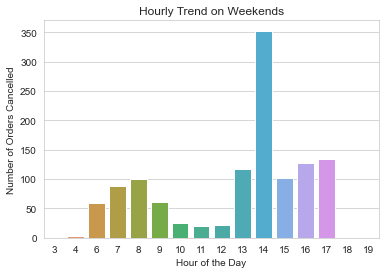

In [20]:
ax = sns.countplot(x='order_time_hour', data=df1.loc[(df1['order_date_dayofweek'] == 'Saturday') | (df1['order_date_dayofweek'] == 'Sunday'),:])
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Orders Cancelled')
ax.set_title('Hourly Trend on Weekends')
ax.get_figure().savefig('out5.png', dpi=300)

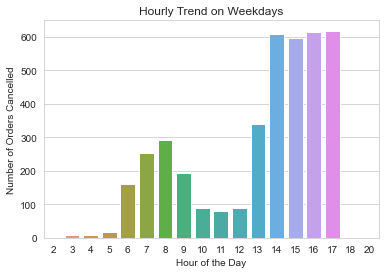

In [21]:
ax = sns.countplot(x='order_time_hour', data=df1.loc[(df1['order_date_dayofweek'] != 'Saturday') & (df1['order_date_dayofweek'] != 'Sunday'),:])
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Orders Cancelled')
ax.set_title('Hourly Trend on Weekdays')
ax.get_figure().savefig('out6.png', dpi=300)

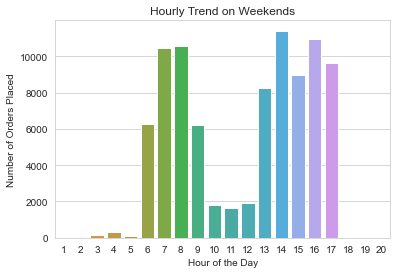

In [22]:
ax = sns.countplot(x='order_time_hour', data=train_data.loc[(train_data['order_date_dayofweek'] == 'Saturday') | (train_data['order_date_dayofweek'] == 'Sunday'),:])
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Orders Placed')
ax.set_title('Hourly Trend on Weekends')
ax.get_figure().savefig('out3.png', dpi=300)

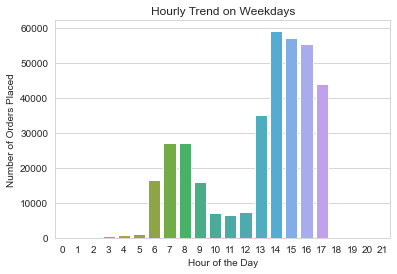

In [23]:
ax = sns.countplot(x='order_time_hour', data=train_data.loc[(train_data['order_date_dayofweek'] != 'Saturday') & (train_data['order_date_dayofweek'] != 'Sunday'),:])
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Orders Placed')
ax.set_title('Hourly Trend on Weekdays')
ax.get_figure().savefig('out4.png', dpi=300)

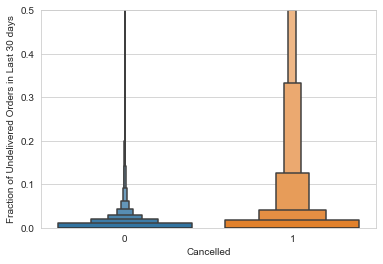

In [24]:
ax = sns.boxenplot(x='cancelled', y='fraction_undelivered', data=train_data)
ax.set_ylim(0,0.5)
ax.set_xlabel('Cancelled')
ax.set_ylabel('Fraction of Undelivered Orders in Last 30 days')
ax.get_figure().savefig('out1.png', dpi=300)


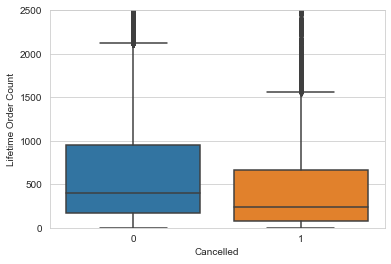

In [25]:
ax = sns.boxplot(x='cancelled', y='lifetime_order_count', data=train_data)
ax.set_ylim(0,2500)
ax.set_xlabel('Cancelled')
ax.set_ylabel('Lifetime Order Count')
ax.get_figure().savefig('out2.png', dpi=300)

In [26]:
df1 = train_data.loc[(train_data['reassigned_order'] == 0) & (train_data['cancelled'] == 0),:]
df2 = train_data.loc[(train_data['reassigned_order'] == 0) & (train_data['cancelled'] == 1),:]
df3 = train_data.loc[(train_data['reassigned_order'] == 1) & (train_data['cancelled'] == 0),:]
df4 = train_data.loc[(train_data['reassigned_order'] == 1) & (train_data['cancelled'] == 1),:]

print('Percentage of orders delivered without reassignment = ', round(len(df1)/len(train_data)*100,2))
print('Percentage of orders cancelled without reassignment = ', round(len(df2)/len(train_data)*100,2))
print('Percentage of orders delivered after reassignment = ', round(len(df3)/len(train_data)*100,2))
print('Percentage of orders reassignment after cancellation = ', round(len(df4)/len(train_data)*100,2))

Percentage of orders delivered without reassignment =  95.95
Percentage of orders cancelled without reassignment =  1.0
Percentage of orders delivered after reassignment =  2.9
Percentage of orders reassignment after cancellation =  0.15
